In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

plt.style.use('science')

In [104]:
t = np.load("Observing_times.npy")
norm_t = t - np.min(t)


bob_bis = np.load("Boblins_star_BIS.npy")
bob_rvs = np.load("Boblins_star_RVs.npy")

wat_bis = np.load("Watsons_star_BIS.npy")
wat_rvs = np.load("Watsons_star_RVs.npy")

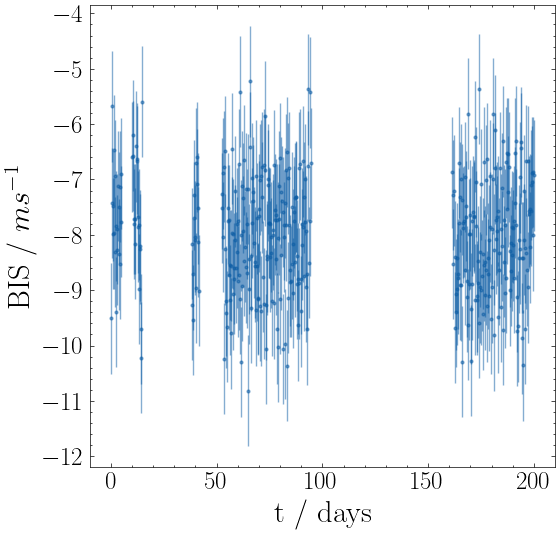

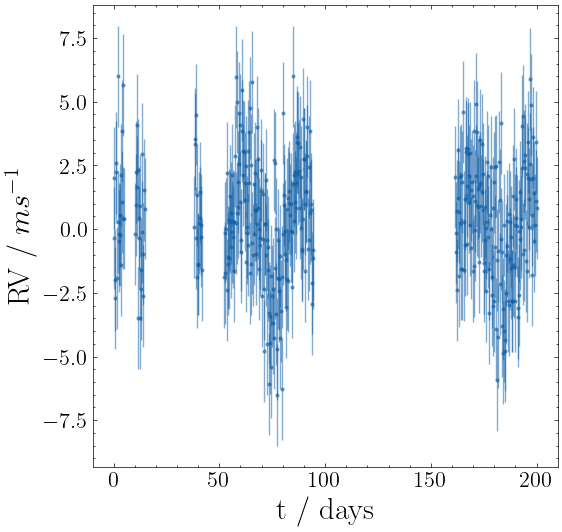

In [105]:
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.errorbar(
    t, 
    bob_bis,
    yerr=1,
    ls="none",
    marker="o",
    ms=2,
    alpha=.5
)
plt.xlabel("t / days", fontsize = 22)
plt.ylabel("BIS / $ms^{-1}$", fontsize = 22)

plt.savefig("bis_bob.png", dpi=300)
plt.show()

plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=16)


plt.errorbar(
    t, 
    bob_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    alpha=.5
)
plt.xlabel("t / days", fontsize = 22)
plt.ylabel("RV / $ms^{-1}$", fontsize = 22)
plt.savefig("RV_bob.png", dpi=300)

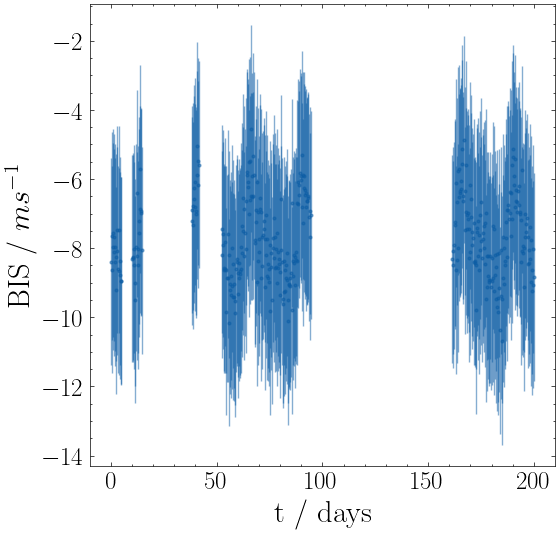

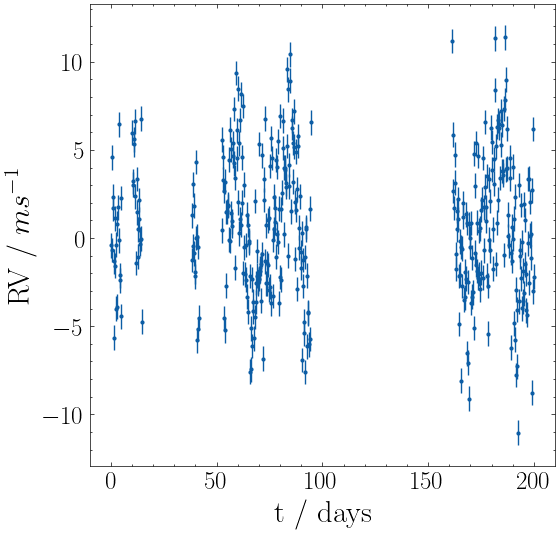

In [106]:
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.errorbar(
    t, 
    wat_bis,
    yerr=3,
    ls="none",
    marker="o",
    ms=2,
    alpha=.5
)
plt.xlabel("t / days", fontsize = 22)
plt.ylabel("BIS / $ms^{-1}$", fontsize = 22)
plt.savefig("BIS_wat.png", dpi=300)

plt.show()
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.errorbar(
    t, 
    wat_rvs,
    yerr=0.7,
    ls="none",
    marker="o",
    ms=2
)
plt.xlabel("t / days", fontsize = 22)
plt.ylabel("RV / $ms^{-1}$", fontsize = 22)
plt.savefig("RV_wat.png", dpi=300)

Periodgrams

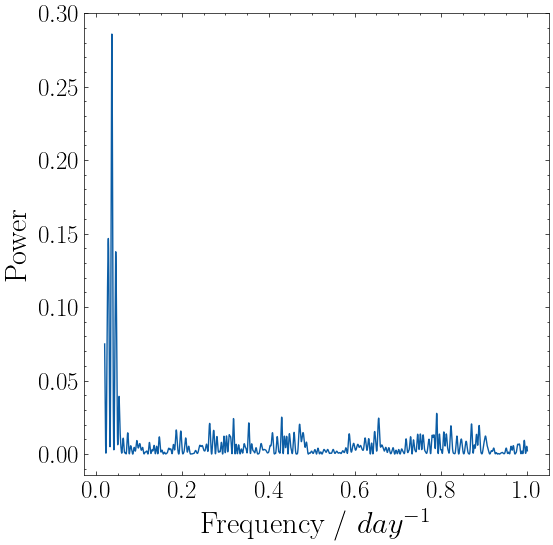

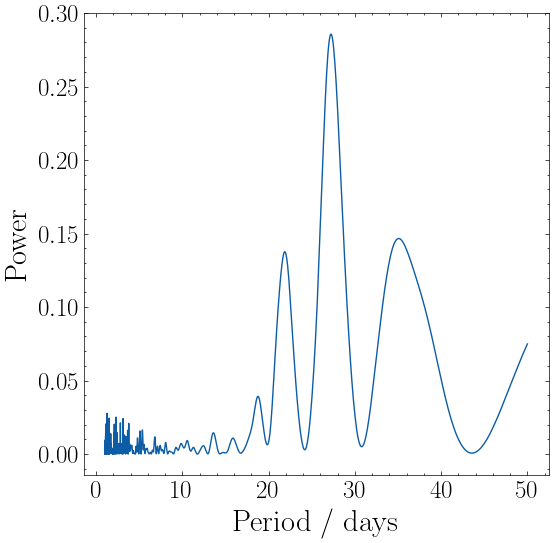

27.240199579634968


'plt.errorbar(\n    (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1,\n    bob_rvs,\n    yerr=2,\n    ls="none",\n    marker="o",\n    ms=2\n)'

In [107]:
frequency, power = LombScargle(t, bob_rvs, 0.7).autopower(
    minimum_frequency=1/50,
    maximum_frequency=1,
    samples_per_peak=50
)
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.plot(
    frequency,
    power
)
plt.xlabel(r"Frequency / $day^{-1}$", fontsize = 22)
plt.ylabel("Power", fontsize = 22)

plt.savefig("bob_periodgram_frequency.png",dpi=300)
plt.show()

plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)


plt.plot(
    1/frequency,
    power
)

plt.xlabel("Period / days", fontsize = 22)
plt.ylabel("Power", fontsize = 22)

plt.savefig("bob_periodgram_time.png",dpi=300)

plt.show()

print(1/frequency[np.argmax(power)])

plt.show()

'''plt.errorbar(
    (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1,
    bob_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2
)'''

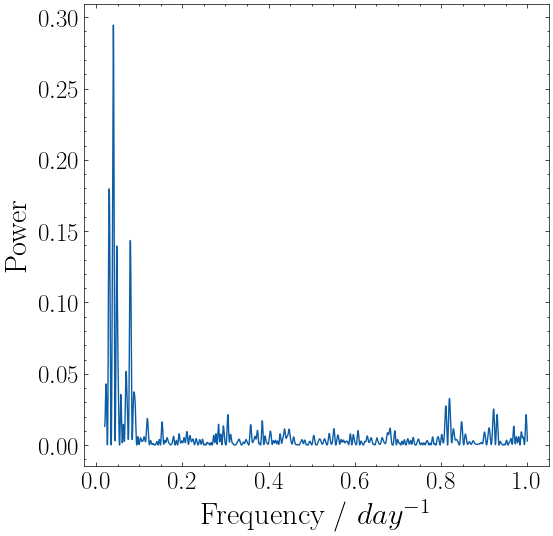

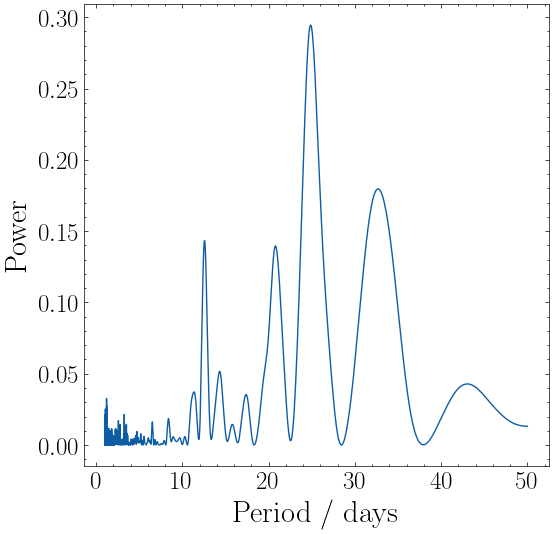

24.867802265179787


<ErrorbarContainer object of 3 artists>

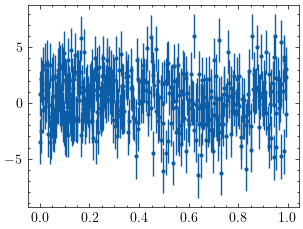

In [108]:
frequency, power = LombScargle(t, wat_rvs, 0.7).autopower(
    minimum_frequency=1/50,
    maximum_frequency=1,
    samples_per_peak=50
)
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.plot(
    frequency,
    power
)
plt.xlabel(r"Frequency / $day^{-1}$", fontsize=22)
plt.ylabel("Power", fontsize=22)

plt.savefig("wat_periodgram_frequency.png",dpi=300)
plt.show()

plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=18)

plt.plot(
    1/frequency,
    power
)

plt.xlabel("Period / days", fontsize=22)
plt.ylabel("Power", fontsize=22)

plt.savefig("wat_periodgram_time.png",dpi=300)

plt.show()

print(1/frequency[np.argmax(power)])

plt.show()

plt.errorbar(
    (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1,
    bob_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2
)


Orbital radial velocity

In [109]:
rv_curve = lambda phase, A, p_off, v_off: A*np.sin(phase*(2*np.pi) + p_off) + v_off

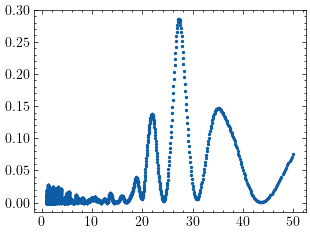

27.240199579634968
[ 1.96080599  1.00779728 -0.07556589]


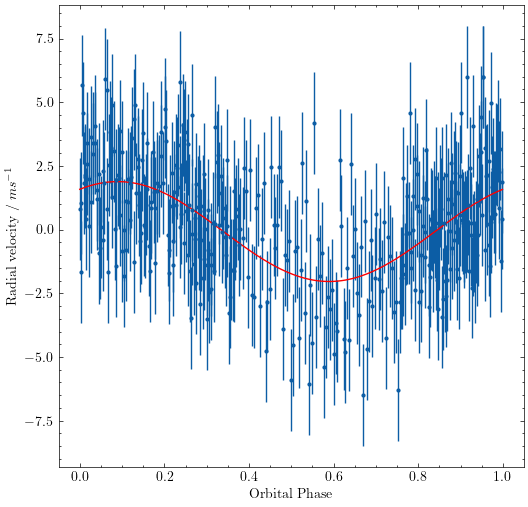

In [180]:
frequency, power = LombScargle(t, bob_rvs, 0.7).autopower(
    minimum_frequency=1/50,
    maximum_frequency=1,
    samples_per_peak=50
)

plt.scatter(
    1/frequency,
    power,
    s=2
)

plt.show()

plt.figure(figsize=(6,6))
print(1/frequency[np.argmax(power)])


phase = (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1

plt.errorbar(
    phase,
    bob_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2
)


plt.plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, bob_rvs, sigma=2.0)[0]),
    c="red"
)


plt.ylabel(r"Radial velocity / $ms^{-1}$")
plt.xlabel("Orbital Phase")
plt.savefig("bob_relative_velocity.png", dpi=300)
print(curve_fit(rv_curve, phase, bob_rvs, sigma=2.0)[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.0878082   8.7132453  -8.00246436]


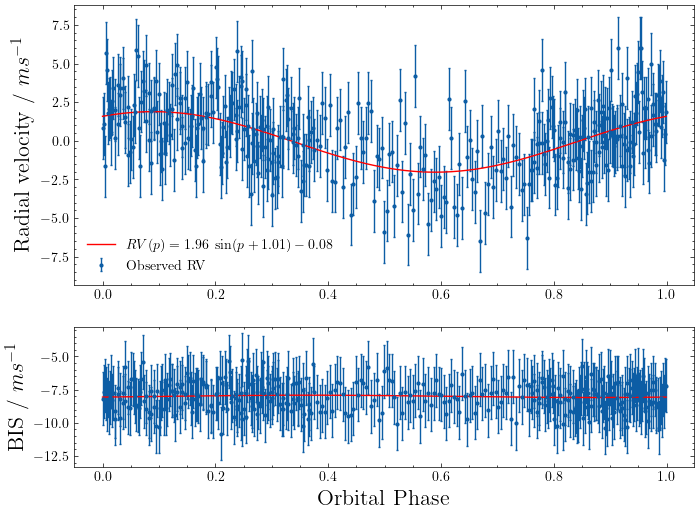

In [182]:
K1, phi, c = curve_fit(rv_curve, phase, bob_rvs, sigma=2.0)[0]

fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(8,6))
phase = (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1

ax[0].errorbar(
    phase,
    bob_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    label="Observed RV",
    capsize=1
)

ax[0].plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, bob_rvs, sigma=2.0)[0]),
    c="red",
    label=f"$RV(p) = {round(K1,2)} \ \sin(p + {round(phi,2)}) {round(c,2)}$"
)

ax[0].legend(loc="lower left")

ax[0].set_ylabel(r"Radial velocity / $ms^{-1}$", fontsize=16)

ax[1].errorbar(
    phase,
    bob_bis,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    #label="BIS",
    capsize=1
)
ax[1].plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, bob_bis, sigma=1.0)[0]),
    c="red",
    #label=r"$BIS(p) = 1.14\ \sin(p -0.06) - 7.81$"
)

ax[1].set_xlabel("Orbital Phase", fontsize=16)
ax[1].set_ylabel(r"BIS / $ms^{-1}$", fontsize=16)
ax[1].legend()

print(curve_fit(rv_curve, phase, bob_bis, sigma=1.0)[0])
plt.savefig("bob_relative_velocity.png", dpi=300)

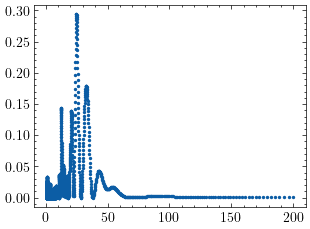

24.861998792683917
[3.20972872 2.42459071 0.71119706]


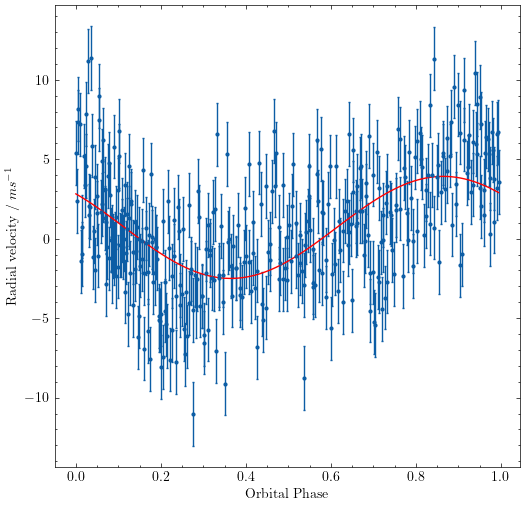

In [183]:
frequency, power = LombScargle(t, wat_rvs, 0.7).autopower(
    minimum_frequency=1/200,
    maximum_frequency=1,
    samples_per_peak=50
)

plt.scatter(
    1/frequency,
    power,
    s=2
)

plt.show()

print(1/frequency[np.argmax(power)])


phase = (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1
plt.figure(figsize=(6,6))

plt.errorbar(
    phase,
    wat_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    capsize=1
)


plt.plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, wat_rvs, sigma=3.0)[0]),
    c="red"
)
plt.ylabel(r"Radial velocity / $ms^{-1}$")
plt.xlabel("Orbital Phase")

plt.savefig("wat_relative_velocity.png", dpi=300)
print(curve_fit(rv_curve, phase, wat_rvs, sigma=3.0)[0])

[ 1.13638187 -0.04818406 -7.81560349]


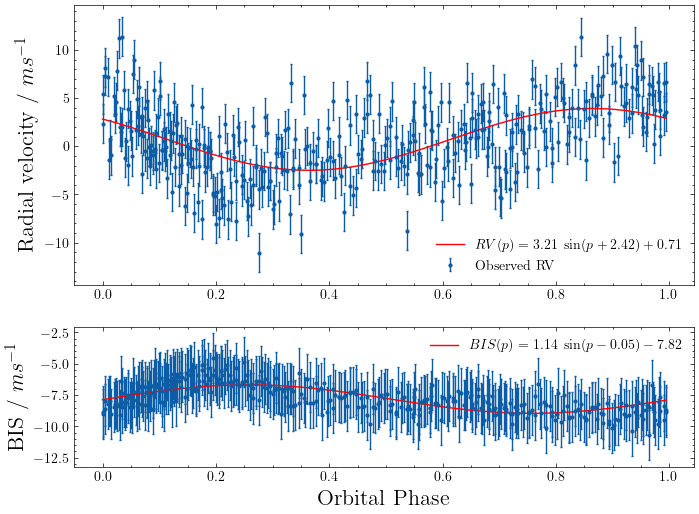

In [184]:
K1, phi, c = curve_fit(rv_curve, phase, wat_rvs, sigma=3.0)[0]

fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(8,6))
phase = (t - t[int(len(t)/2)])/(1/frequency[np.argmax(power)]) % 1

ax[0].errorbar(
    phase,
    wat_rvs,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    label="Observed RV",
    capsize=1
)


ax[0].plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, wat_rvs, sigma=3.0)[0]),
    c="red",
    label=f"$RV(p) = {round(K1,2)} \ \sin(p + {round(phi,2)}) + {round(c,2)}$"
)

ax[0].legend(loc="lower right")

ax[0].set_ylabel(r"Radial velocity / $ms^{-1}$", fontsize=16)



# Plot residuals

ax[1].errorbar(
    phase,
    wat_bis,
    yerr=2,
    ls="none",
    marker="o",
    ms=2,
    #label="BIS",
    capsize=1
)

K1, phi, c = curve_fit(rv_curve, phase, wat_bis, sigma=0.7)[0]


ax[1].plot(
    np.sort(phase),
    rv_curve(np.sort(phase), *curve_fit(rv_curve, phase, wat_bis, sigma=0.7)[0]),
    c="red",
    label=f"$BIS(p) = {round(K1,2)} \ \sin(p {round(phi,2)}) {round(c,2)}$"
)

ax[1].set_xlabel("Orbital Phase", fontsize=16)
ax[1].set_ylabel(r"BIS / $ms^{-1}$", fontsize=16)
ax[1].legend()

print(curve_fit(rv_curve, phase, wat_bis, sigma=0.7)[0])
plt.savefig("wat_relative_velocity.png", dpi=300)

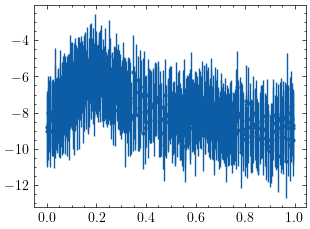

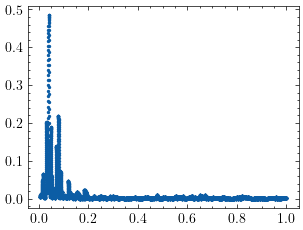

In [178]:
plt.errorbar(
    phase,
    wat_bis,
    yerr=2,
    ls="none",
    marker="o",
    ms=2
)
plt.show()

frequency, power = LombScargle(t, wat_bis, 0.7).autopower(
    minimum_frequency=1/200,
    maximum_frequency=1,
    samples_per_peak=50
)
plt.scatter(
    frequency,
    power,
    s=2
)

plt.show()

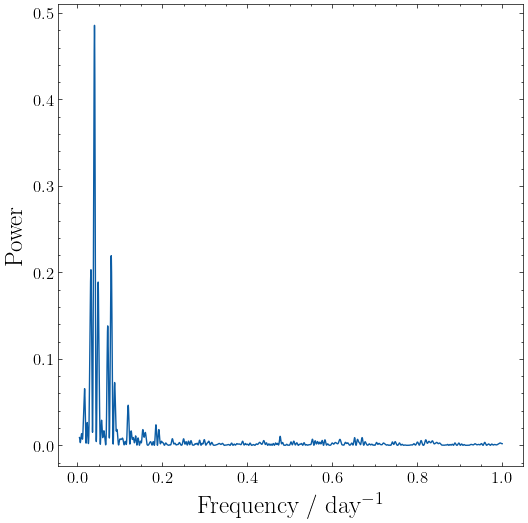

24.800301700791657


In [98]:
plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=12)

frequency, power = LombScargle(t, wat_bis, 0.7).autopower(
    minimum_frequency=1/200,
    maximum_frequency=1,
    samples_per_peak=50
)

plt.plot(
    frequency,
    power
)
plt.xlabel(r"Frequency / day$^{-1}$", fontsize = 18)
plt.ylabel("Power", fontsize = 18)
plt.savefig("BIS_period_wat.png", dpi=300)
plt.show()
print(1/frequency[np.argmax(power)])

In [99]:
pearsonr(
    wat_bis,
    wat_rvs
)

PearsonRResult(statistic=-0.4235657157110873, pvalue=6.886010369034628e-18)

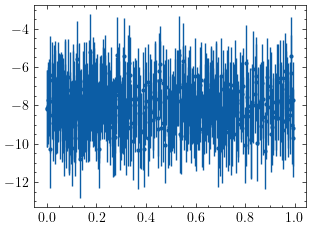

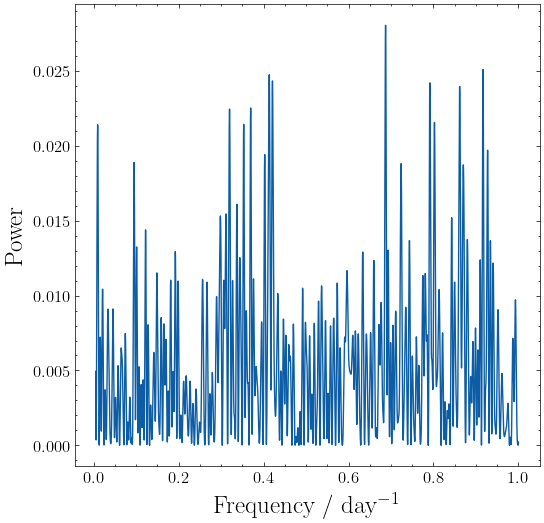

In [100]:
plt.errorbar(
    phase,
    bob_bis,
    yerr=2,
    ls="none",
    marker="o",
    ms=2
)
plt.show()

plt.figure(figsize=(6,6))
plt.tick_params(axis='both', which='major', labelsize=12)


frequency, power = LombScargle(t, bob_bis, 0.7).autopower(
    minimum_frequency=1/200,
    maximum_frequency=1,
    samples_per_peak=50
)

plt.plot(
    frequency,
    power
)
plt.xlabel(r"Frequency / day$^{-1}$", fontsize = 18)
plt.ylabel("Power", fontsize = 18)
plt.savefig("BIS_period.png", dpi=300)
plt.show()

In [244]:
pearsonr(
    bob_bis,
    bob_rvs
)

PearsonRResult(statistic=-0.06572219358605765, pvalue=0.20233319114504894)

In [165]:
from scipy.special import cbrt

In [172]:
G = 6.67 * 10**-11
Mjup = 1.898 * 10**27
Msun = 1.99 * 10**30

def planet_mass(K, M_s, P):
    return (Mjup * K)/28.4329 * (M_s/Msun)**(2/3) * (P/(365.25))**(1/3)

def planet_semi_major_axis(P):
    return cbrt((G * Msun * P**2)/(4 * np.pi**2))/au

In [173]:
# Boblin's
planet_semi_major_axis(27.240199579634968*24*60**2)

0.1771863781786584

In [174]:
# Watson's
planet_semi_major_axis(24.9*24*60**2)

0.1668872040956702

In [156]:
# Boblin's
planet_mass(
    K = 1.96080599,
    M_s = Msun,
    P = 27.240199579634968,
) #/ Msun

5.509552963406143e+25

In [157]:
(1.29*10**-3)**-0.5

27.842302319485224

In [158]:
# Watson's 

planet_mass(
    K = 3.20972872,
    M_s = Msun,
    P = 24.861998792683917,
) #/ Msun

8.748333235478504e+25

In [78]:
(2.89*10**29)/(1.99*10**30)

0.14522613065326634

Q2) b

In [7]:
from scipy.constants import au

In [11]:
au

149597870700.0

In [27]:
def M(upper_radius, lower_radius):
    return 2*np.pi*(3.4*10**4)*(1.496*10**11)**1.5*((upper_radius*au)**0.5 - (lower_radius*au)**0.5)

In [68]:
M(20, 1e-3)

2.1230100252908565e+28

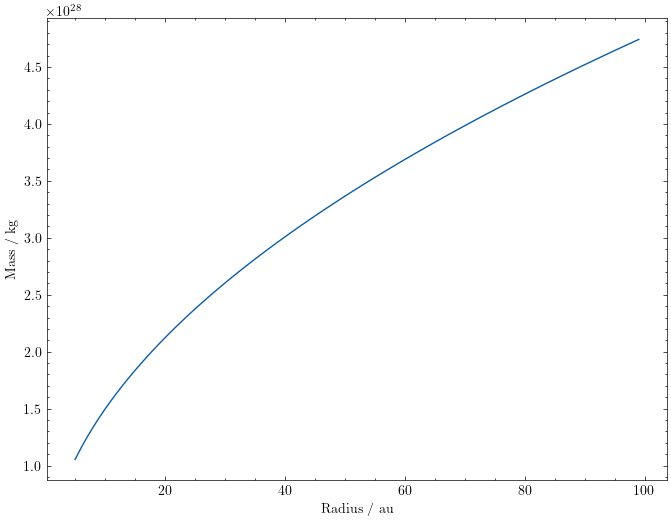

In [71]:
masses = []
for i in range(5, 100, 1):
    masses.append(M(i, 1e-3))

plt.figure(figsize=(8,6))

plt.plot(
    [i for i in range(5, 100)],
    masses,

)
plt.xlabel("Radius / au")
plt.ylabel("Mass / kg")
plt.savefig("jupiter_mass.png", dpi=300)


In [186]:

M(10.48 - (10.48-5.2)/2, 5.2 - (5.2-2.05)/2) #/ (1.898 * 10**27)

4.28404855669938e+27

In [66]:
M(19.22 - (19.22-5.2)/2, 5.2 - (5.2-2.05)/2) / (1.898 * 10**27)

4.006010154412296

In [76]:
M(10, 1e-3)

1.4967665755100518e+28

In [65]:
7.603407273074539e+27

7.603407273074539e+27

In [59]:
5.2 - (5.2-2.05)/2

3.625

In [60]:
19.22 - (19.22-5.2)/2

12.209999999999999

In [52]:
# Mass of jupiter - 1.898 × 10^27 kg

In [74]:
(1*10**28)/(1.99*10**30)

0.005025125628140704

In [75]:
(5*10**28)/(1.99*10**30)

0.025125628140703515

In [80]:
0.005 * (1.324)/((5*10**28)/(1.99*10**30))

0.26347600000000004